In [5]:
import os
import pandas as pd
from tensorboard.backend.event_processing import event_accumulator

# Path to your tfevents file
path_to_folder = "/Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox"
file_in_folder = "/" + "events.out.tfevents.1749508832.LAPTOP-0SF95AIV.18584.0"
path = path_to_folder + file_in_folder

# Load events
ea = event_accumulator.EventAccumulator(path)
ea.Reload()

# Get scalars
tags = ea.Tags()["scalars"]

for tag in tags:
    events = ea.Scalars(tag)
    df = pd.DataFrame([(e.step, e.wall_time, e.value) for e in events],
                      columns=["step", "wall_time", "value"])
    filename = f"{tag.replace('/', '_')}.csv"
    save_path = os.path.join(path_to_folder, filename)
    df.to_csv(save_path, index=False)
    print(f"Saved: {os.path.abspath(save_path)}")

Saved: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox/centralized_accuracy.csv
Saved: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox/distributed_loss.csv
Saved: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox/centralized_loss.csv


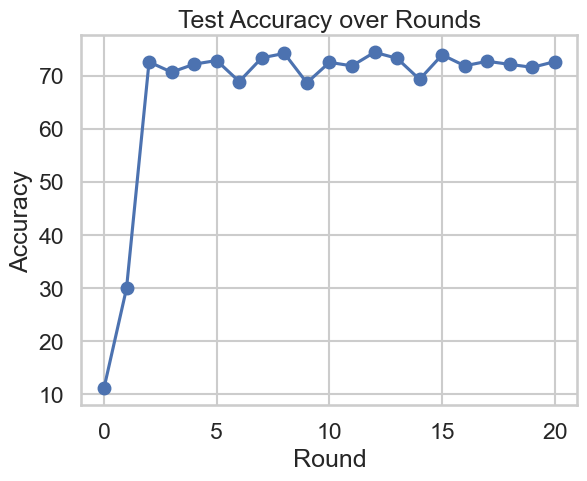

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV
df = pd.read_csv("/Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox/centralized_accuracy.csv")  # Replace with actual filename

# Plot accuracy vs rounds
plt.plot(df['step'], df['value'], marker='o')
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.title("Test Accuracy over Rounds")
plt.grid(True)
plt.show()

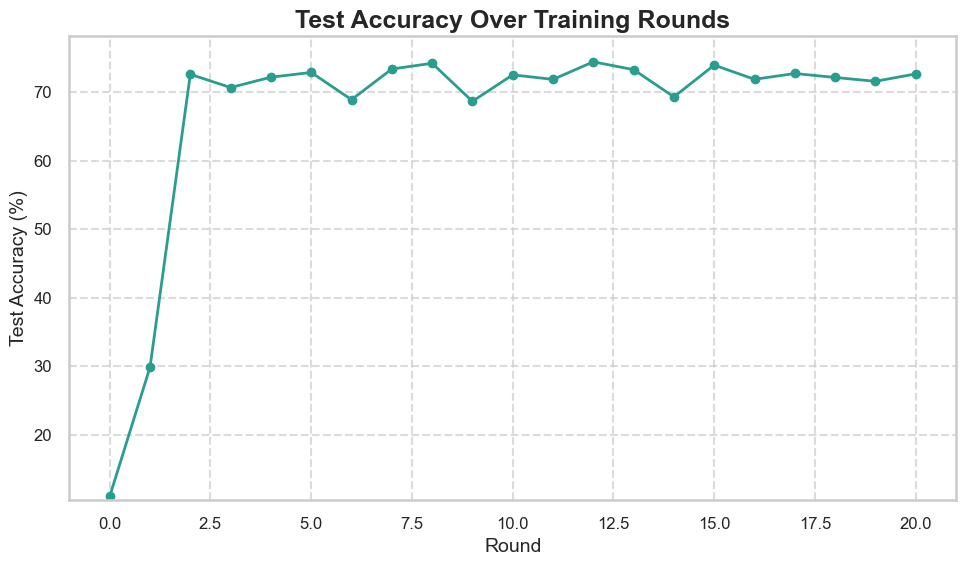

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn for nicer aesthetics
sns.set(style="whitegrid", context="talk", palette="deep")

df = pd.read_csv("/Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox/centralized_accuracy.csv", encoding='latin1')  # Replace with actual filename

plt.figure(figsize=(10, 6))
plt.plot(df['step'], df['value'], marker='o', linestyle='-', linewidth=2, markersize=6, color="#2A9D8F")
plt.xlabel("Round", fontsize=14)
plt.ylabel("Test Accuracy (%)", fontsize=14)
plt.title("Test Accuracy Over Training Rounds", fontsize=18, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(min(df['value']) * 0.95, max(df['value']) * 1.05)  # slight padding
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
import os
import pandas as pd
from tensorboard.backend.event_processing import event_accumulator

def convert_tfevents_to_csv(folder_path, filename):
    path = os.path.join(folder_path, filename)
    ea = event_accumulator.EventAccumulator(path)
    ea.Reload()

    for tag in ea.Tags().get("scalars", []):
        events = ea.Scalars(tag)
        df = pd.DataFrame([(e.step, e.wall_time, e.value) for e in events],
                          columns=["step", "wall_time", "value"])
        csv_filename = f"{tag.replace('/', '_')}.csv"
        save_path = os.path.join(folder_path, csv_filename)
        df.to_csv(save_path, index=False)
        print(f"Saved: {os.path.abspath(save_path)}")

Saved CSV: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox/centralized_accuracy.csv
Saved CSV: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox/distributed_loss.csv
Saved CSV: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox/centralized_loss.csv
Saved CSV: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/iid/fedavg/5 clients/centralized_accuracy.csv
Saved CSV: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/iid/fedavg/5 clients/distributed_loss.csv
Saved CSV: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/iid/fedavg/5 clients/centralized_loss.csv


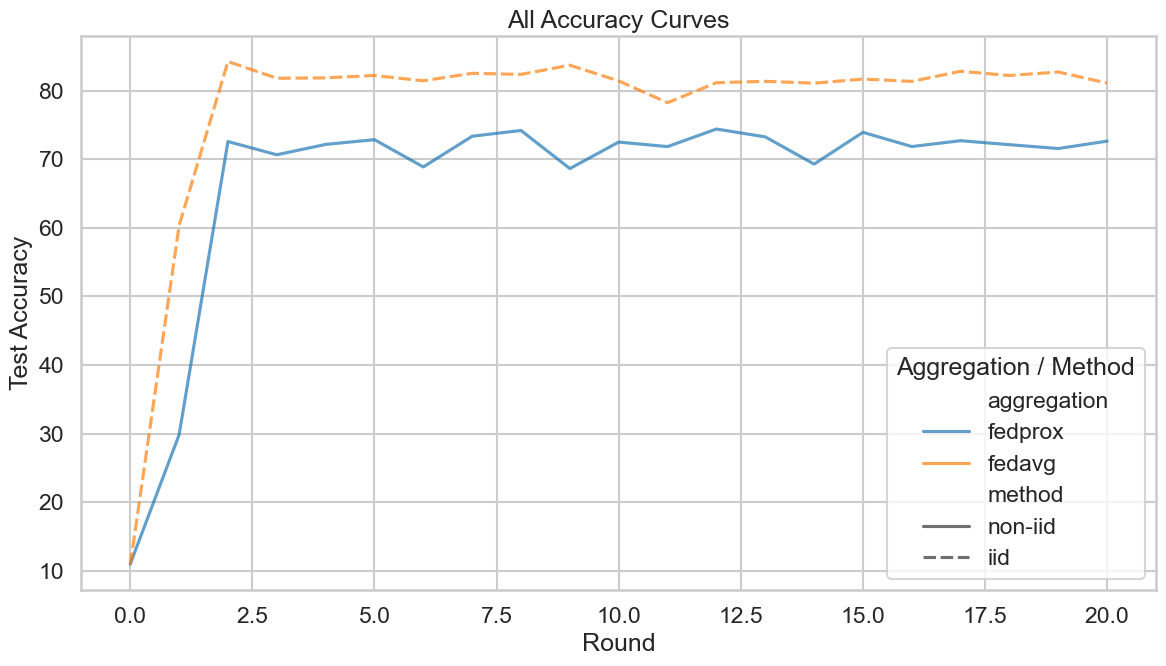

/var/folders/j7/hsgkr4350rl2cf351s81fqj40000gn/T/ipykernel_58791/580313758.py:82: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


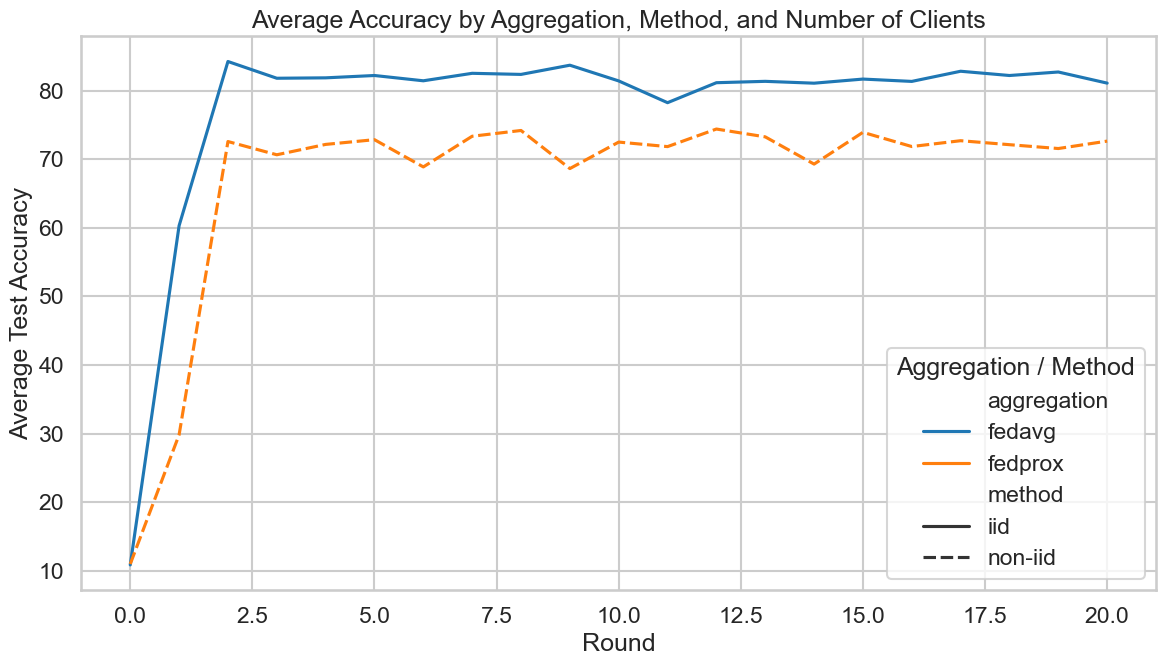

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
from tensorboard.backend.event_processing import event_accumulator

# Function to convert .tfevents to CSVs
def convert_tb_event_to_csv(event_path, save_folder):
    ea = event_accumulator.EventAccumulator(event_path)
    ea.Reload()
    tags = ea.Tags().get("scalars", [])

    saved_files = []
    for tag in tags:
        events = ea.Scalars(tag)
        df = pd.DataFrame([(e.step, e.wall_time, e.value) for e in events],
                          columns=["step", "wall_time", "value"])
        filename = f"{tag.replace('/', '_')}.csv"
        save_path = os.path.join(save_folder, filename)
        df.to_csv(save_path, index=False)
        saved_files.append(save_path)
        print(f"Saved CSV: {save_path}")
    return saved_files

# Read the CSV listing paths and metadata
paths_csv = "plot_path.csv"
df_meta = pd.read_csv(paths_csv)

# Convert all .tfevents files to CSV before proceeding
for _, row in df_meta.iterrows():
    folder = os.path.dirname(row['filepath'])
    convert_tb_event_to_csv(row['filepath'], folder)

# Countdown before continuing
for i in range(15, 0, -1):
    print(f"Waiting {i}s to ensure all CSVs are saved...", end='\r')
    time.sleep(1)

# Refresh metadata to find CSVs
df_meta['folder'], df_meta['filename'] = zip(*df_meta['filepath'].apply(lambda p: os.path.split(p)))
df_meta['csv_file'] = df_meta.apply(
    lambda row: os.path.join(row['folder'], "centralized_accuracy.csv"), axis=1)

# Load all CSVs with metadata
all_dfs = []
for idx, row in df_meta.iterrows():
    try:
        df = pd.read_csv(row['csv_file'])
        df['aggregation'] = row['aggregation']
        df['method'] = row['method']
        df['num_clients'] = row['num_clients']
        all_dfs.append(df)
    except Exception as e:
        print(f"Skipping {row['csv_file']} due to error: {e}")

combined_df = pd.concat(all_dfs, ignore_index=True)

# Plot all accuracy curves
sns.set(style="whitegrid", context="talk", palette="colorblind")
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=combined_df,
    x='step', y='value',
    hue='aggregation', style='method',
    palette='tab10',
    estimator=None,
    alpha=0.7
)
plt.title("All Accuracy Curves")
plt.xlabel("Round")
plt.ylabel("Test Accuracy")
plt.legend(title="Aggregation / Method")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot averaged accuracy
avg_df = combined_df.groupby(['aggregation', 'method', 'num_clients', 'step'], as_index=False)['value'].mean()

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=avg_df,
    x='step', y='value',
    hue='aggregation', style='method',
    palette='tab10',
    ci='sd'
)
plt.title("Average Accuracy by Aggregation, Method, and Number of Clients")
plt.xlabel("Round")
plt.ylabel("Average Test Accuracy")
plt.legend(title="Aggregation / Method")
plt.grid(True)
plt.tight_layout()
plt.show()

Starting TensorBoard log conversion...
Saved CSV: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox/centralized_accuracy.csv
Saved CSV: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox/distributed_loss.csv
Saved CSV: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox/centralized_loss.csv
Saved CSV: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/iid/fedavg/5 clients/centralized_accuracy.csv
Saved CSV: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/iid/fedavg/5 clients/distributed_loss.csv
Saved CSV: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/iid/fedavg/5 clients/centralized_loss.csv

Waiting 15 seconds to ensure all CSVs are saved...
Proc

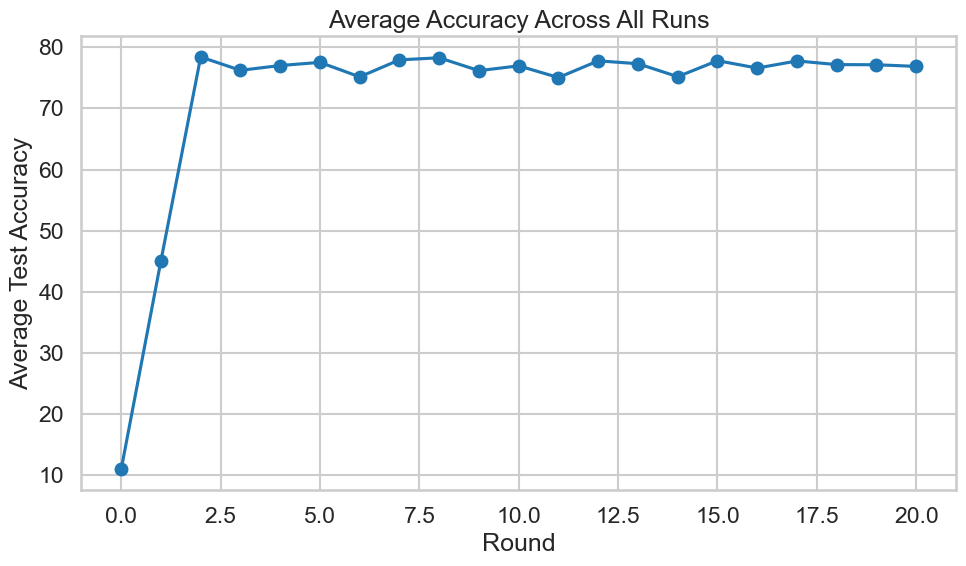

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
from tensorboard.backend.event_processing import event_accumulator

def convert_tb_event_to_csv(event_path, save_folder):
    ea = event_accumulator.EventAccumulator(event_path)
    ea.Reload()
    tags = ea.Tags().get("scalars", [])

    saved_files = []
    for tag in tags:
        events = ea.Scalars(tag)
        df = pd.DataFrame([(e.step, e.wall_time, e.value) for e in events],
                          columns=["step", "wall_time", "value"])
        filename = f"{tag.replace('/', '_')}.csv"
        save_path = os.path.join(save_folder, filename)
        df.to_csv(save_path, index=False)
        saved_files.append(save_path)
        print(f"Saved CSV: {save_path}")
    return saved_files

# Read the CSV listing paths and metadata
paths_csv = "plot_path.csv"
df_meta = pd.read_csv(paths_csv)

# Convert .tfevents to CSV for all listed files
print("Starting TensorBoard log conversion...")
for _, row in df_meta.iterrows():
    folder = os.path.dirname(row['filepath'])
    convert_tb_event_to_csv(row['filepath'], folder)

# Wait 15 seconds after all conversions
print("\nWaiting 15 seconds to ensure all CSVs are saved...")
for i in range(15, 0, -1):
    print(f"{i}s remaining...", end='\r')
    time.sleep(1)
print("Proceeding...\n")

# Prepare filepaths for the specific accuracy CSV (adjust filename if different)
df_meta['folder'], df_meta['filename'] = zip(*df_meta['filepath'].apply(lambda p: os.path.split(p)))
df_meta['csv_file'] = df_meta.apply(
    lambda row: os.path.join(row['folder'], "centralized_accuracy.csv"), axis=1)

# Load all CSVs and assign metadata correctly
all_dfs = []
for idx, row in df_meta.iterrows():
    try:
        df = pd.read_csv(row['csv_file'])
        # Add metadata columns
        df['aggregation'] = row['aggregation']
        df['method'] = row['method']
        df['num_clients'] = row['num_clients']
        all_dfs.append(df)
    except Exception as e:
        print(f"Skipping {row['csv_file']} due to error: {e}")

combined_df = pd.concat(all_dfs, ignore_index=True)

# Average across all runs (all files) by step (ignore aggregation, method, num_clients)
avg_df = combined_df.groupby('step', as_index=False)['value'].mean()

# Plot the single averaged accuracy curve
sns.set(style="whitegrid", context="talk", palette="colorblind")
plt.figure(figsize=(10, 6))
plt.plot(avg_df['step'], avg_df['value'], marker='o', color='tab:blue')
plt.title("Average Accuracy Across All Runs")
plt.xlabel("Round")
plt.ylabel("Average Test Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

Starting TF event to CSV conversion...
Saved: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox/centralized_accuracy.csv
Saved: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox/distributed_loss.csv
Saved: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox/centralized_loss.csv
Saved: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/iid/fedavg/5 clients/centralized_accuracy.csv
Saved: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/iid/fedavg/5 clients/distributed_loss.csv
Saved: /Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/iid/fedavg/5 clients/centralized_loss.csv
Conversion done. Waiting 15 seconds before proceeding...
Proceeding with plottin

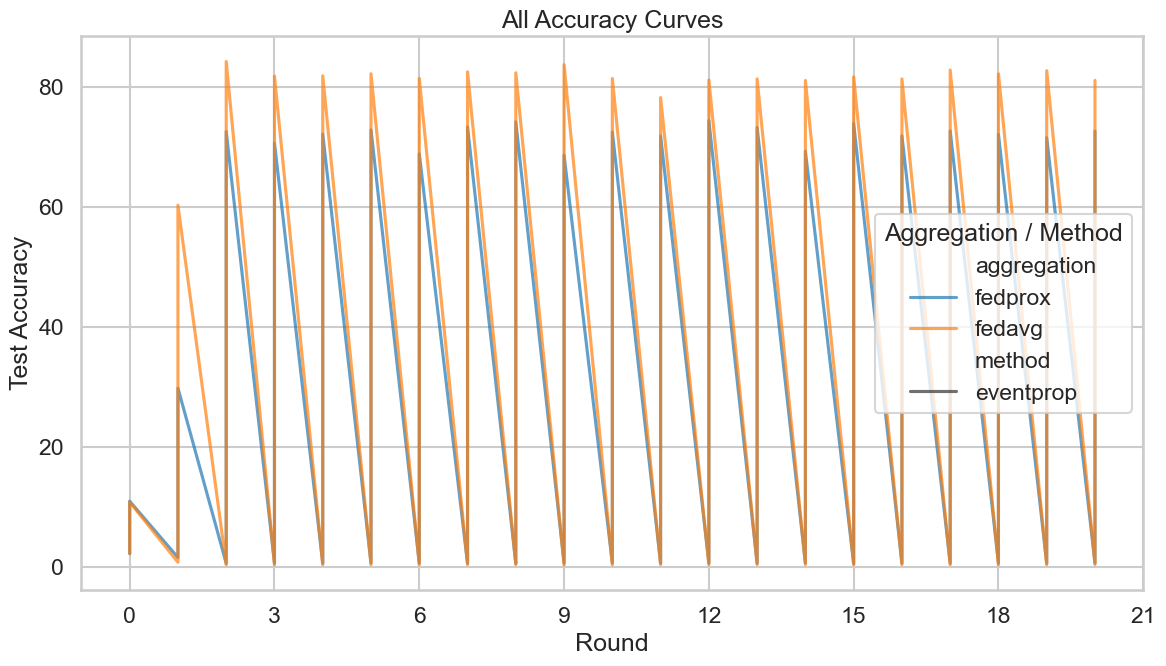

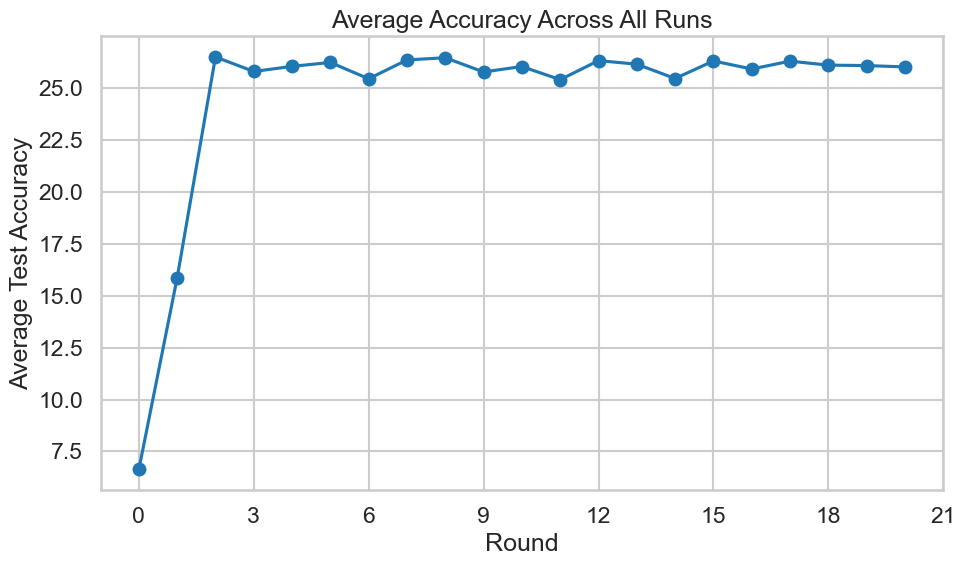

In [20]:
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from tensorboard.backend.event_processing import event_accumulator

# === Function to convert TF events to CSV ===
def convert_tf_to_csv(tfevent_path, save_folder):
    ea = event_accumulator.EventAccumulator(tfevent_path)
    ea.Reload()
    tags = ea.Tags()["scalars"]
    saved_files = []
    for tag in tags:
        events = ea.Scalars(tag)
        df = pd.DataFrame([(e.step, e.wall_time, e.value) for e in events],
                          columns=["step", "wall_time", "value"])
        filename = f"{tag.replace('/', '_')}.csv"
        save_path = os.path.join(save_folder, filename)
        df.to_csv(save_path, index=False)
        saved_files.append(save_path)
        print(f"Saved: {os.path.abspath(save_path)}")
    return saved_files

# === List of TF event files and their metadata ===
tf_event_files = [
    ("/Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox/events.out.tfevents.1749508832.LAPTOP-0SF95AIV.18584.0",
     "/Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/non-iid/fedprox",
     "fedprox", "eventprop", 5),
    ("/Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/iid/fedavg/5 clients/events.out.tfevents.1749425014.LAPTOP-0SF95AIV.16504.0",
     "/Users/julian/projects/University/Period5/FederatedLearning-SNN/results/eventprop/federated_server/iid/fedavg/5 clients",
     "fedavg", "eventprop", 5)
]

# === Convert TF events to CSV ===
print("Starting TF event to CSV conversion...")
for tf_path, folder, agg, method, n_clients in tf_event_files:
    convert_tf_to_csv(tf_path, folder)
print("Conversion done. Waiting 15 seconds before proceeding...")
for remaining in range(15, 0, -1):
    print(f"Continuing in {remaining} seconds...", end='\r')
    time.sleep(1)
print("Proceeding with plotting.\n")

# === Now read the CSV paths and metadata from a file (or build it here) ===
# You can replace this with your actual 'plot_path.csv' reading

# For demo, build dataframe manually from converted CSVs
all_csv_files = []
all_metadata = []

for tf_path, folder, agg, method, n_clients in tf_event_files:
    # List all CSVs generated in the folder after conversion
    files = [f for f in os.listdir(folder) if f.endswith(".csv")]
    for f in files:
        all_csv_files.append(os.path.join(folder, f))
        all_metadata.append({
            "filepath": os.path.join(folder, f),
            "aggregation": agg,
            "method": method,
            "num_clients": n_clients
        })

df_meta = pd.DataFrame(all_metadata)

# --- Load CSV data and assign metadata ---
all_dfs = []
for idx, row in df_meta.iterrows():
    try:
        df = pd.read_csv(row['filepath'], encoding='latin1')
        df['aggregation'] = row['aggregation']
        df['method'] = row['method']
        df['num_clients'] = row['num_clients']
        all_dfs.append(df)
    except Exception as e:
        print(f"Skipping {row['filepath']} due to error: {e}")

combined_df = pd.concat(all_dfs, ignore_index=True)

# --- Plot all accuracy curves ---
sns.set(style="whitegrid", context="talk", palette="colorblind")

plt.figure(figsize=(12, 7))
sns.lineplot(
    data=combined_df,
    x='step', y='value',
    hue='aggregation', style='method',
    palette='tab10',
    estimator=None,
    alpha=0.7
)
plt.title("All Accuracy Curves")
plt.xlabel("Round")
plt.ylabel("Test Accuracy")
plt.legend(title="Aggregation / Method")
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

# --- Plot average accuracy over all runs combined (single curve) ---
avg_df = combined_df.groupby('step', as_index=False)['value'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_df['step'], avg_df['value'], marker='o', color='tab:blue')
plt.title("Average Accuracy Across All Runs")
plt.xlabel("Round")
plt.ylabel("Average Test Accuracy")
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()